#第5章: 係り受け解析

####[日本語Wikipedia](https://ja.wikipedia.org/)の「[人工知能](https://ja.wikipedia.org/wiki/%E4%BA%BA%E5%B7%A5%E7%9F%A5%E8%83%BD)」に関する記事からテキスト部分を抜き出したファイルが[ai.ja.zip](https://nlp100.github.io/data/ai.ja.zip)に収録されている． この文章を[CaboCha](https://taku910.github.io/cabocha/)や[KNP](http://nlp.ist.i.kyoto-u.ac.jp/index.php?KNP)等のツールを利用して係り受け解析を行い，その結果をai.ja.txt.parsedというファイルに保存せよ．このファイルを読み込み，以下の問に対応するプログラムを実装せよ．

In [1]:
#データのダウンロード
!wget https://nlp100.github.io/data/ai.ja.zip
!unzip /content/ai.ja.zip
!rm -r /content/ai.ja.zip


--2024-04-16 04:42:38--  https://nlp100.github.io/data/ai.ja.zip
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.111.153, 185.199.109.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17516 (17K) [application/zip]
Saving to: ‘ai.ja.zip’

ai.ja.zip           100%[===================>]  17.11K  --.-KB/s    in 0.001s  

2024-04-16 04:42:38 (24.3 MB/s) - ‘ai.ja.zip’ saved [17516/17516]

Archive:  /content/ai.ja.zip
  inflating: ai.ja.txt               
replace readme.ai.ja.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: readme.ai.ja.md         


In [2]:
#MeCabのインストール
!apt install -y \
    curl \
    file \
    git \
    libmecab-dev \
    make \
    mecab \
    mecab-ipadic-utf8 \
    swig \
    xz-utils
!pip install mecab-python3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libmecab-dev is already the newest version (0.996-14build9).
make is already the newest version (4.3-4.1build1).
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-3).
xz-utils is already the newest version (5.2.5-2ubuntu1).
mecab is already the newest version (0.996-14build9).
swig is already the newest version (4.0.2-1ubuntu1).
curl is already the newest version (7.81.0-1ubuntu1.16).
file is already the newest version (1:5.41-3ubuntu0.1).
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [7]:
# CRF++-0.58
import os

filename_crfpp = 'crfpp.tar.gz'
!wget "https://drive.google.com/uc?export=download&id=0B4y35FiV1wh7QVR6VXJ5dWExSTQ" \
    -O filename_crfpp
%cd CRF++-0.58
!./configure
!make
!make install
%cd ..

os.environ['LD_LIBRARY_PATH'] += ':/usr/local/lib'

--2024-04-16 04:48:44--  https://drive.google.com/uc?export=download&id=0B4y35FiV1wh7QVR6VXJ5dWExSTQ
Resolving drive.google.com (drive.google.com)... 173.194.215.102, 173.194.215.101, 173.194.215.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.215.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=0B4y35FiV1wh7QVR6VXJ5dWExSTQ&export=download [following]
--2024-04-16 04:48:44--  https://drive.usercontent.google.com/download?id=0B4y35FiV1wh7QVR6VXJ5dWExSTQ&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.26.132, 2607:f8b0:400c:c04::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.26.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 790570 (772K) [application/octet-stream]
Saving to: ‘filename_crfpp’

filename_crfpp      100%[===================>] 772.04K  --.-KB/s    in 0.01s  

In [4]:
!tar -xvf "/content/drive/MyDrive/Colab Notebooks/100-knock/5章/cabocha-0.69.tar.bz2"
#!tar -xvf "/content/cabocha-0.69.tar.bz2"

cabocha-0.69/
cabocha-0.69/cabocha-config.in
cabocha-0.69/compile
cabocha-0.69/swig/
cabocha-0.69/swig/version.h.in
cabocha-0.69/swig/Makefile
cabocha-0.69/swig/version.h
cabocha-0.69/swig/CaboCha.i
cabocha-0.69/missing
cabocha-0.69/java/
cabocha-0.69/java/test.java
cabocha-0.69/java/Makefile
cabocha-0.69/java/org/
cabocha-0.69/java/org/chasen/
cabocha-0.69/java/org/chasen/cabocha/
cabocha-0.69/java/org/chasen/cabocha/FormatType.java
cabocha-0.69/java/org/chasen/cabocha/OutputLayerType.java
cabocha-0.69/java/org/chasen/cabocha/Token.java
cabocha-0.69/java/org/chasen/cabocha/CaboChaConstants.java
cabocha-0.69/java/org/chasen/cabocha/ParserType.java
cabocha-0.69/java/org/chasen/cabocha/ParsingAlgorithm.java
cabocha-0.69/java/org/chasen/cabocha/Chunk.java
cabocha-0.69/java/org/chasen/cabocha/InputLayerType.java
cabocha-0.69/java/org/chasen/cabocha/CaboCha.java
cabocha-0.69/java/org/chasen/cabocha/CaboChaJNI.java
cabocha-0.69/java/org/chasen/cabocha/PossetType.java
cabocha-0.69/java/org/ch

In [8]:
%cd cabocha-0.69
!./configure --with-mecab-config=`which mecab-config` --with-charset=UTF8
!make
!make check
!make install
%cd ..
!cabocha --version

/content/cabocha-0.69
checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking whether make supports nested variables... yes
checking whether to enable maintainer-specific portions of Makefiles... no
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking whether gcc understands -c and -o together... yes
checking for style of include used by make... GNU
checking dependency style of gcc... none
checking for g++... g++
checking 

In [9]:
!cabocha --version

cabocha of 0.69


In [10]:
! cabocha -f1 -o /content/ai.ja.txt.parsed /content/ai.ja.txt
! rm /content/ai.ja.txt

In [11]:
! head -n 5 /content/ai.ja.txt.parsed
# 1行目の* 0 -1D 1/1 0.000000 の部分が係り受け情報
# 3文字目の 0 が文節番号
# その後の -1 が係先を示す -1は係先なしを示す

* 0 -1D 1/1 0.000000
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
EOS
EOS


#40. 係り受け解析結果の読み込み（形態素）

#####形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，係り受け解析の結果（ai.ja.txt.parsed）を読み込み，各文をMorphオブジェクトのリストとして表現し，冒頭の説明文の形態素列を表示せよ．

In [12]:
# ==============
# 40. 係り受け解析結果の読み込み（形態素）
# ==============
import re

# 区切り文字
separator = re.compile('\t|,')

class Morph:
    def __init__(self, morph):
        temp = separator.split(morph)
        self.surface = temp[0] # 表層系（ surface )
        self.base = temp[7]     # 基本形（ base )
        self.pos = temp[1]      # 品詞　（ pos )
        self.pos1 = temp[2]     # 品詞細分類1（ pos1 )

def make_morphlist(fname):
    sentences = []
    morphs = []
    with open(fname, 'r') as f:
        for line in f:
            if line[0] == '*':
                continue
            elif line != 'EOS\n':
                morphs.append(Morph(line))
            elif len(morphs) > 0:
                sentences.append(morphs)
                morphs = []
        return sentences

morph_list = make_morphlist('/content/ai.ja.txt.parsed')

for morph in morph_list[1]:
    print(vars(morph))

{'surface': '人工', 'base': '人工', 'pos': '名詞', 'pos1': '一般'}
{'surface': '知能', 'base': '知能', 'pos': '名詞', 'pos1': '一般'}
{'surface': '（', 'base': '（', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'じん', 'base': 'じん', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'こうち', 'base': 'こうち', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'のう', 'base': 'のう', 'pos': '助詞', 'pos1': '終助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': 'AI', 'base': '*\n', 'pos': '名詞', 'pos1': '一般'}
{'surface': '〈', 'base': '〈', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'エーアイ', 'base': '*\n', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': '〉', 'base': '〉', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': '）', 'base': '）', 'pos': '記号', 'pos1': '括弧閉'}
{'surface': 'と', 'base': 'と', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '「', 'base': '「', 'pos': '記号', 'pos1': '括弧開'}
{

#41. 係り受け解析結果の読み込み（文節・係り受け）

#####40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストの係り受け解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，冒頭の説明文の文節の文字列と係り先を表示せよ．本章の残りの問題では，ここで作ったプログラムを活用せよ．

In [13]:
# ==============
# 41. 係り受け解析結果の読み込み（文節・係り受け）
# ==============

# 係り受けかどうかの正規表現
check = re.compile(r'''(?:\*\s\d+\s) # キャプチャ対象外
                            (-?\d+)       # 数字(係り先)
                          ''', re.VERBOSE)
# re.VERBOSEを渡すことで、空白やコメントを正規表現パターンから除外できる

class Chunk:
    def __init__(self, morphs, dst):
        self.morphs = morphs
        self.srcs = []   # 係り元文節インデックス番号のリスト
        self.dst  = dst  # 係り先文節インデックス番号

# 係り元を代入し、Chunkリストを文のリストを追加
def append_sentence(chunks, sentences):
    # 係り元を代入
    for i, chunk in enumerate(chunks):
        if chunk.dst != -1:
            chunks[chunk.dst].srcs.append(i)
    sentences.append(chunks)
    return sentences, []

def make_chunklist(fname):
    morphs = []
    chunks = []
    sentences = []

    with open(fname, 'r') as f:

        for line in f:
            checks = check.match(line)

            # EOSまたは係り受け解析結果でない場合
            if not (line == 'EOS\n' or checks):
                morphs.append(Morph(line))

            # 係り受け解析結果で、形態素解析結果がある場合
            elif len(morphs) > 0:
                chunks.append(Chunk(morphs, dst))
                morphs = []

            # 係り受け結果の場合
            if checks:
                # 係り先を代入
                dst = int(checks.group(1))

            # EOSで係り受け結果がある場合
            if line == 'EOS\n' and len(chunks) > 0:
                sentences, chunks = append_sentence(chunks, sentences)
        return sentences

sentences = make_chunklist('/content/ai.ja.txt.parsed')

for i, chunk in enumerate(sentences[1]):
    print('{}: {}, 係り先:{}, 係り元:{}'.format(i, [morph.surface for morph in chunk.morphs], chunk.dst, chunk.srcs))

0: ['人工', '知能'], 係り先:17, 係り元:[]
1: ['（', 'じん', 'こうち', 'のう', '、', '、'], 係り先:17, 係り元:[]
2: ['AI'], 係り先:3, 係り元:[]
3: ['〈', 'エーアイ', '〉', '）', 'と', 'は', '、'], 係り先:17, 係り元:[2]
4: ['「', '『', '計算'], 係り先:5, 係り元:[]
5: ['（', '）', '』', 'という'], 係り先:9, 係り元:[4]
6: ['概念', 'と'], 係り先:9, 係り元:[]
7: ['『', 'コンピュータ'], 係り先:8, 係り元:[]
8: ['（', '）', '』', 'という'], 係り先:9, 係り元:[7]
9: ['道具', 'を'], 係り先:10, 係り元:[5, 6, 8]
10: ['用い', 'て'], 係り先:12, 係り元:[9]
11: ['『', '知能', '』', 'を'], 係り先:12, 係り元:[]
12: ['研究', 'する'], 係り先:13, 係り元:[10, 11]
13: ['計算', '機', '科学'], 係り先:14, 係り元:[12]
14: ['（', '）', 'の'], 係り先:15, 係り元:[13]
15: ['一', '分野', '」', 'を'], 係り先:16, 係り元:[14]
16: ['指す'], 係り先:17, 係り元:[15]
17: ['語', '。'], 係り先:34, 係り元:[0, 1, 3, 16]
18: ['「', '言語', 'の'], 係り先:20, 係り元:[]
19: ['理解', 'や'], 係り先:20, 係り元:[]
20: ['推論', '、'], 係り先:21, 係り元:[18, 19]
21: ['問題', '解決', 'など', 'の'], 係り先:22, 係り元:[20]
22: ['知的', '行動', 'を'], 係り先:24, 係り元:[21]
23: ['人間', 'に'], 係り先:24, 係り元:[]
24: ['代わっ', 'て'], 係り先:26, 係り元:[22, 23]
25: ['コンピューター', 'に'], 係り先:26, 係り元:[]
2

#42. 係り元と係り先の文節の表示

#####係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [14]:
# ==============
# 42. 係り元と係り先の文節の表示
# ==============

sentences = make_chunklist('/content/ai.ja.txt.parsed')

for i, sentence in enumerate(sentences):
    print('----', i, '----')
    for j, chunk in enumerate(sentence):
        if chunk.dst != -1:
            src = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs])
            dst = ''.join([morph.surface if morph.pos != '記号' else '' for morph in sentence[chunk.dst].morphs])
            print('{}:{}\t{}'.format(j, src, dst))
    if i >= 1:
        break

---- 0 ----
---- 1 ----
0:人工知能	語
1:じんこうちのう	語
2:AI	エーアイとは
3:エーアイとは	語
4:計算	という
5:という	道具を
6:概念と	道具を
7:コンピュータ	という
8:という	道具を
9:道具を	用いて
10:用いて	研究する
11:知能を	研究する
12:研究する	計算機科学
13:計算機科学	の
14:の	一分野を
15:一分野を	指す
16:指す	語
17:語	研究分野とも
18:言語の	推論
19:理解や	推論
20:推論	問題解決などの
21:問題解決などの	知的行動を
22:知的行動を	代わって
23:人間に	代わって
24:代わって	行わせる
25:コンピューターに	行わせる
26:行わせる	技術または
27:技術または	研究分野とも
28:計算機	コンピュータによる
29:コンピュータによる	情報処理システムの
30:知的な	情報処理システムの
31:情報処理システムの	実現に関する
32:設計や	実現に関する
33:実現に関する	研究分野とも
34:研究分野とも	される


#43. 名詞を含む文節が動詞を含む文節に係るものを抽出

#####名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [15]:
# ==============
# 43. 名詞を含む文節が動詞を含む文節に係るものを抽出
# ==============

sentences = make_chunklist('/content/ai.ja.txt.parsed')

for sentence in sentences:
    for chunk in sentence:
        if chunk.dst != -1:
            src = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs])
            src_pos = [morph.pos for morph in chunk.morphs]
            dst = ''.join([morph.surface if morph.pos != '記号' else '' for morph in sentence[chunk.dst].morphs])
            dst_pos = [morph.pos for morph in sentence[chunk.dst].morphs]
            if '名詞' in src_pos and '動詞' in dst_pos:
                print(src, dst, sep='\t')

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される
解説で	述べている
佐藤理史は	述べている
次のように	述べている
知的能力を	実現する
コンピュータ上で	実現する
技術ソフトウェアコンピュータシステム	ある
応用例は	ある
推論判断を	模倣する
画像データを	解析して
解析して	検出抽出したりする
パターンを	検出抽出したりする
画像認識等が	ある
1956年に	命名された
ダートマス会議で	命名された
ジョンマッカーシーにより	命名された
命名された	使われている
現在では	使われている
記号処理を	用いた
記述を	する
主体と	する
意味あいでも	使われている
思考ルーチンも	呼ばれる
ことも	ある
カウンセラーを	模倣した
プログラム	出されるが
人工無脳が	出されるが
引き合いに	出されるが
計算機に	させようという
役割を	させようという
エキスパートシステムと	呼ばれる
実現は	困難視されている
人間が	持つ
暗黙に	持つ
記述が	なり
問題と	なり
利用が	困難視されている
困難視されている	ある
アプローチとしては	知られているが
アプローチも	知られているが
差は	ある
記号的明示性に	ある
その後	集めた
サポートベクターマシンが	集めた
注目を	集めた
経験を	行う
元に	行う
学習を	行う
手法も	ある
宇宙において	実装するという
言葉通り	実装するという
知性を	表現し
機械的に	表現し
表現し	実装するという
登場により	行った
流行を	超えて
社会に	浸透して
浸透して	行った
2017年にかけて	導入した
ディープラーニングを	導入した
プレイヤーも	破り
麻雀では	なった
MicrosoftSuphx(SuperPhoenix)」が	到達するなど
AIとして	到達するなど
十段に	到達するなど
到達するなど	なった
最先端技術と	なった
人工知能は	呼ばれ
機械学習と	呼ばれ
ものが	ある
学習を	繰り返す
ことを	している
基本と	している
システム	関係している
経験に	基づく
手法であり	関係している
ソフトコンピューティングと	関係している
関係している	ある
手法としては	ある
ものが	ある
これらを	統合した
知的システムを	

#44. 係り受け木の可視化

#####与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，[Graphviz](http://www.graphviz.org/)等を用いるとよい．

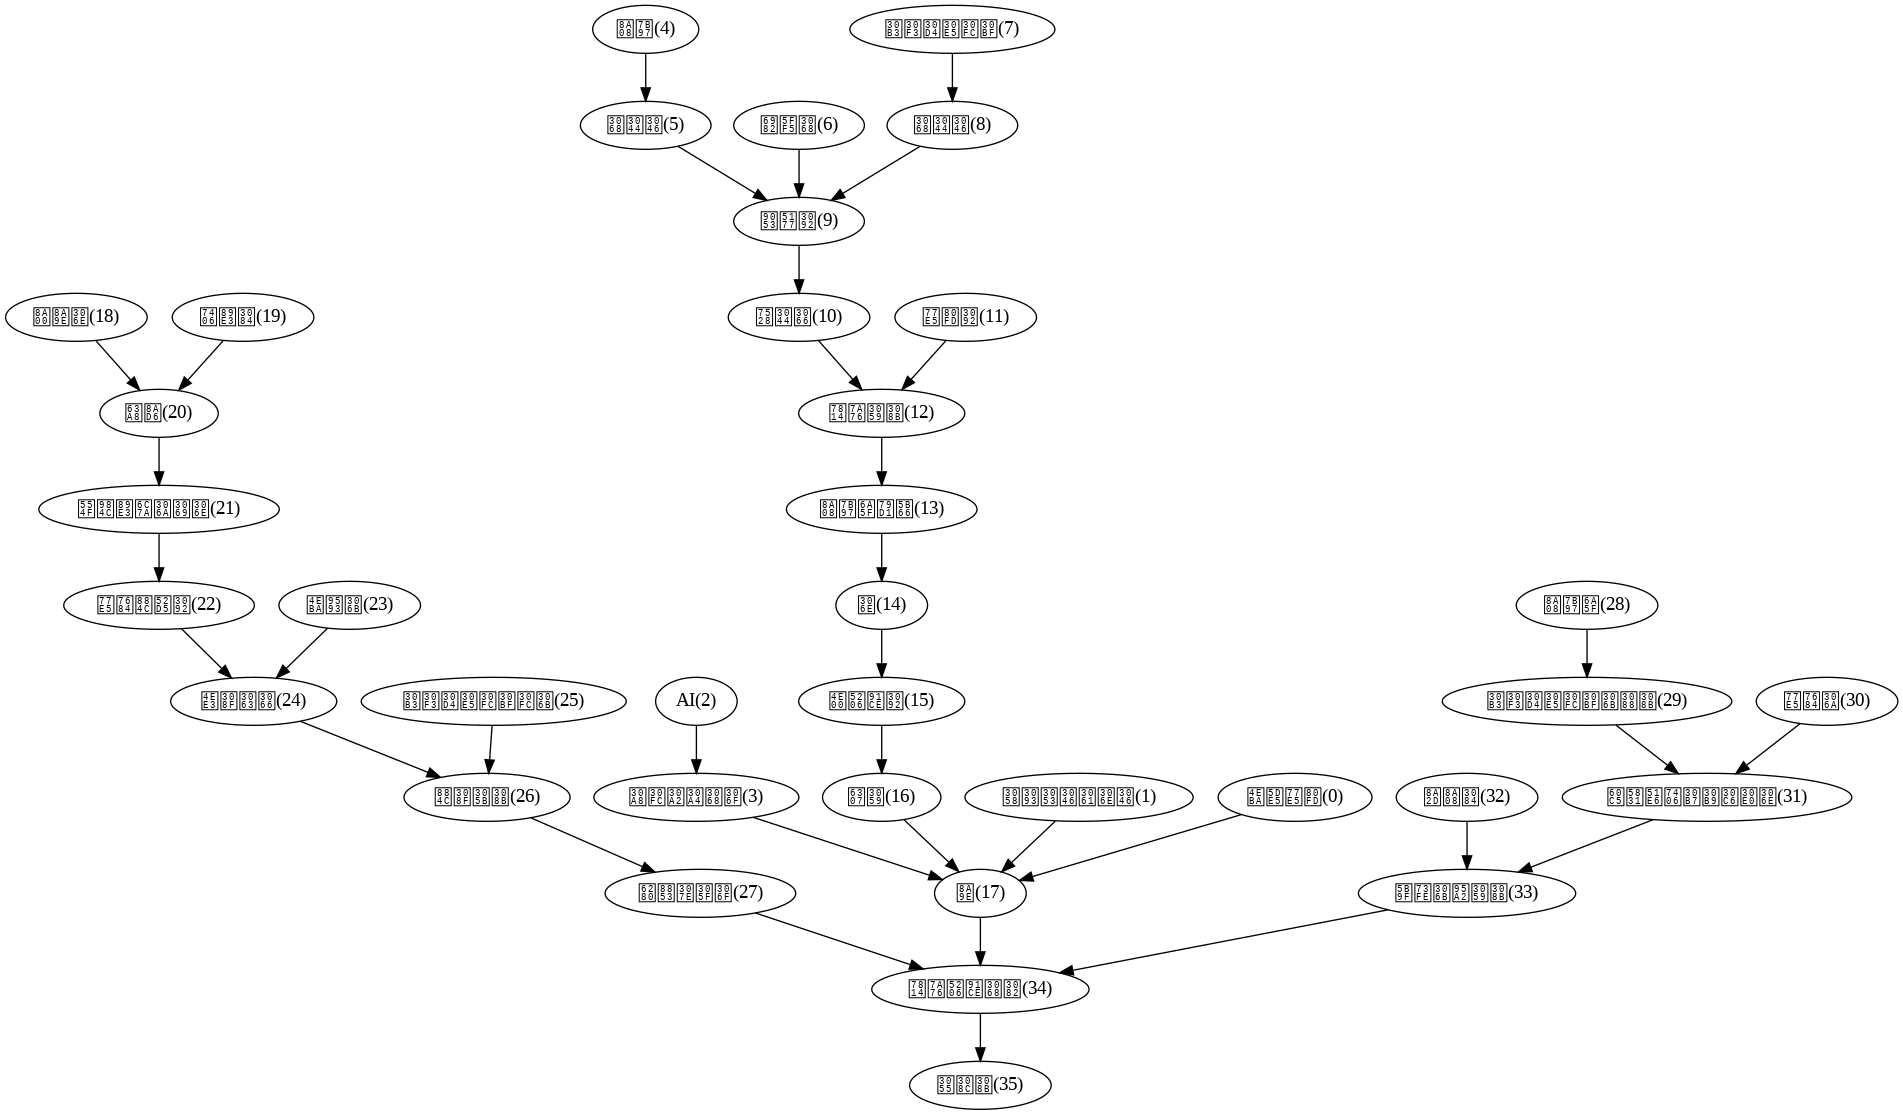

In [24]:
# ==============
# 44. 係り受け木の可視化
# ==============
import pydot
from IPython.display import Image,display_png
from graphviz import Digraph

sentences = make_chunklist('/content/ai.ja.txt.parsed')
sentence = sentences[1]
edges = []
for id, chunk in enumerate(sentence):
    if chunk.dst != -1:
        src = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs] + ['(' + str(id) + ')'])
        dst = ''.join([morph.surface if morph.pos != '記号' else '' for morph in sentence[chunk.dst].morphs] + ['(' + str(chunk.dst) + ')'])
        edges.append([src, dst])
n = pydot.Node('node')
n.fontname = 'IPAGothic'
g = pydot.graph_from_edges(edges, directed=True)
g.add_node(n)
g.write_png('/content/result44.png')
display_png(Image('/content/result44.png'))

In [25]:
with open('/content/example45.txt', 'w') as f:
    print('ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。', file=f)

! cabocha -f1 -o /content/example45.txt.parsed /content/example45.txt
! rm /content/example45.txt

#45. 動詞の格パターンの抽出

#####今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ．

- 動詞を含む文節において，最左の動詞の基本形を述語とする

- 述語に係る助詞を格とする

- 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる

#####「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．

```
作り出す	で は を
```

#####このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．

- コーパス中で頻出する述語と格パターンの組み合わせ

- 「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）

In [26]:
# ==============
# 45. 動詞の各パターンの抽出
# ==============

# sentences = make_chunklist('/content/example45.txt.parsed')
sentences = make_chunklist('/content/ai.ja.txt.parsed')

with open('/content/result45.txt', 'w') as f:
    for sentence in sentences:
        for chunk in sentence:
            for morph in chunk.morphs:
                if morph.pos == '動詞':  # 左から順番に動詞を探す
                    particle_list = []   # 助詞のリスト
                    for src in chunk.srcs:  # 動詞があった場合には係元から助詞を探す
                        particle_list = particle_list + [morph.surface for morph in sentence[src].morphs if morph.pos == '助詞']
                    if len(particle_list) > 0:  # 助詞があった場合は辞書順にソート(setを用いて重複を削除)
                        particle_list = sorted(set(particle_list))
                        line = '{}\t{}'.format(morph.base, ' '.join(particle_list))
                        print(line, file=f)
                    break

In [27]:
# コーパス中で頻出する述語と格パターンの組み合わせの確認
print("------------------------------------------")
! cat /content/result45.txt | sort | uniq -c | sort -nr | head -n 5
print("------------------------------------------")
# 「行う」と格パターンの組み合わせの確認
! cat /content/result45.txt | grep '行う' | sort | uniq -c | sort -nr | head -n 5
print("------------------------------------------")
# 「なる」と格パターンの組み合わせの確認
! cat /content/result45.txt | grep 'なる' | sort | uniq -c | sort -nr | head -n 5
print("------------------------------------------")
# 「与える」と格パターンの組み合わせの確認
! cat /content/result45.txt | grep '与える' | sort | uniq -c | sort -nr | head -n 5
print("------------------------------------------")

------------------------------------------
     49 する	を
     19 する	が
     15 する	に
     15 する	と
     12 する	は を
------------------------------------------
      8 行う	を
      1 行う	まで を
      1 行う	は を をめぐって
      1 行う	は を
      1 行う	に を
------------------------------------------
      3 なる	に は
      3 なる	が と
      2 なる	に
      2 なる	と
      1 異なる	も
------------------------------------------
      1 与える	に は を
      1 与える	が に
      1 与える	が など に
------------------------------------------


#46. 動詞の格フレーム情報の抽出

#####45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．45の仕様に加えて，以下の仕様を満たすようにせよ．

- 項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）

- 述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる

#####「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．

```
作り出す	で は を	会議で ジョンマッカーシーは 用語を
```

In [28]:
# ==============
# 46. 動詞の格フレーム情報の抽出
# ==============

# sentences = make_chunklist('/content/example45.txt.parsed')
sentences = make_chunklist('/content/ai.ja.txt.parsed')

with open('/content/result46.txt', 'w') as f:
    for sentence in sentences:
        for chunk in sentence:
            for morph in chunk.morphs:
                if morph.pos == '動詞':  # 左から順番に動詞を探す
                    particle_list = []   # 助詞のリスト
                    chunk_list = []      # 文節のリスト
                    for src in chunk.srcs:  # 動詞があった場合には係元から助詞を探す
                        particle = [morph.surface for morph in sentence[src].morphs if morph.pos == '助詞']
                        if len(particle) > 0:
                            particle_list = particle_list + particle
                            chunk_list.append(''.join(morph.surface for morph in sentence[src].morphs if morph.pos != '記号'))
                    if len(particle_list) > 0:  # 助詞があった場合は辞書順にソート(setを用いて重複を削除)
                        particle_list = sorted(set(particle_list))
                        chunk_list = sorted(chunk_list, key=lambda x : x[-1])
                        line = '{}\t{}\t{}'.format(morph.base, ' '.join(particle_list), ' '.join(chunk_list))
                        print(line, file=f)
                    break

In [29]:
# 確認
! head -n 5 /content/result46.txt

用いる	を	道具を
する	て を	用いて 知能を
指す	を	一分野を
代わる	に を	人間に 知的行動を
行う	て に	代わって コンピューターに


In [30]:
with open('/content/example47.txt', 'w') as f:
    print('また、自らの経験を元に学習を行う強化学習という手法もある。', file=f)

! cabocha -f1 -o /content/example47.txt.parsed /content/example47.txt
! rm /content/example47.txt

#47. 機能動詞構文のマイニング

#####動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．

- 「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする

- 述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる

- 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる

- 述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）

例えば「また、自らの経験を元に学習を行う強化学習という手法もある。」という文から，以下の出力が得られるはずである．

```
学習を行う	に を	元に 経験を
```

In [31]:
# ==============
# 47. 機能動詞構文のマイニング
# ==============

# sentences = make_chunklist('/content/example47.txt.parsed')
sentences = make_chunklist('/content/ai.ja.txt.parsed')

with open('/content/result47.txt', 'w') as f:
    for sentence in sentences:
        for chunk in sentence:
            for morph in chunk.morphs:
                if morph.pos == '動詞': # 左から順番に動詞を探す
                    for i, src in enumerate(chunk.srcs):
                        if len(sentence[src].morphs) == 2 and sentence[src].morphs[0].pos1 == 'サ変接続' and sentence[src].morphs[1].surface == 'を':
                            predicate = ''.join([sentence[src].morphs[0].surface, sentence[src].morphs[1].surface, morph.base])
                            particle = []       # 助詞
                            particle_list = []  # 助詞のリスト
                            chunk_list = []     # 文節のリスト
                            for src_r in chunk.srcs[:i] + chunk.srcs[i + 1:]:   # 残りの係元から助詞を探す
                                for morph in sentence[src_r].morphs:
                                    if morph.pos == '助詞':
                                        particle.append(morph.surface)
                                if len(particle) > 0:
                                    particle_list = particle_list + particle
                                    chunk_list.append(' '.join(morph.surface for morph in sentence[src_r].morphs if morph.pos != '記号'))
                            if len(particle_list) > 0:
                                particle_list = sorted(set(particle_list))
                                chunk_list = sorted(chunk_list, key=lambda x : x[-1])
                                line = '{}\t{}\t{}'.format(predicate, ' '.join(particle_list), ' '.join(chunk_list))
                                print(line, file=f)
                            break

In [32]:
# コーパス中で頻出する述語（サ変接続名詞+を+動詞）の確認
print("------------------------------------------")
! cat /content/result47.txt | cut -f 1 | sort | uniq -c | sort -nr | head -n 5
print("------------------------------------------")
# コーパス中で頻出する述語と助詞パターン
!cat /content/result47.txt | cut -f 1,2 | sort | uniq -c | sort -nr | head -n 5
print("------------------------------------------")

------------------------------------------
      3 注目を集める
      2 運転をする
      2 研究をいる
      1 開発を行う
      1 進化を見せる
------------------------------------------
      1 開発を行う	は
      1 運転をする	に
      1 運転をする	て に
      1 進化を見せる	て において は
      1 進化をいる	て において は
------------------------------------------


In [33]:
with open('/content/example48.txt', 'w') as f:
    print('ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。', file=f)

! cabocha -f1 -o /content/example48.txt.parsed /content/example48.txt
! rm /content/example48.txt

#48. 名詞から根へのパスの抽出

#####文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．

- 各文節は（表層形の）形態素列で表現する

- パスの開始文節から終了文節に至るまで，各文節の表現を” -> “で連結する

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．

```
ジョンマッカーシーは -> 作り出した
AIに関する -> 最初の -> 会議で -> 作り出した
最初の -> 会議で -> 作り出した
会議で -> 作り出した
人工知能という -> 用語を -> 作り出した
用語を -> 作り出した
```
#####KNPを係り受け解析に用いた場合，次のような出力が得られると思われる．
```
ジョンマッカーシーは -> 作り出した
ＡＩに -> 関する -> 会議で -> 作り出した
会議で -> 作り出した
人工知能と -> いう -> 用語を -> 作り出した
用語を -> 作り出した
```

In [34]:
# ==============
# 48. 名詞から根へのパスの抽出
# ==============

# sentences = make_chunklist('/content/example48.txt.parsed')
sentences = make_chunklist('/content/ai.ja.txt.parsed')

for sentence in sentences:
    for chunk in sentence:
        if '名詞' in [morph.pos for morph in chunk.morphs]:
            path = [''.join(morph.surface for morph in chunk.morphs if morph.pos != '記号')]
            while chunk.dst != -1:
                path.append(''.join(morph.surface for morph in sentence[chunk.dst].morphs if morph.pos != '記号'))
                chunk = sentence[chunk.dst]
            print(' -> '.join(path))

人工知能
人工知能 -> 語 -> 研究分野とも -> される
じんこうちのう -> 語 -> 研究分野とも -> される
AI -> エーアイとは -> 語 -> 研究分野とも -> される
エーアイとは -> 語 -> 研究分野とも -> される
計算 -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
概念と -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
コンピュータ -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
知能を -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
一分野を -> 指す -> 語 -> 研究分野とも -> される
語 -> 研究分野とも -> される
言語の -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
理解や -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
人間に -> 代わって -> 行わせる -> 技術または 

#49. 名詞間の係り受けパスの抽出

#####文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号がiとj（i<j）のとき，係り受けパスは以下の仕様を満たすものとする．

- 問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を” -> “で連結して表現する

- 文節iとjに含まれる名詞句はそれぞれ，XとYに置換する

#####また，係り受けパスの形状は，以下の2通りが考えられる．

- 文節iから構文木の根に至る経路上に文節jが存在する場合: 文節iから文節jのパスを表示

- 上記以外で，文節iと文節jから構文木の根に至る経路上で共通の文節kで交わる場合: 文節iから文節kに至る直前のパスと文節jから文節kに至る直前までのパス，文節kの内容を” | “で連結して表示

#####「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．

```
Xは | Yに関する -> 最初の -> 会議で | 作り出した
Xは | Yの -> 会議で | 作り出した
Xは | Yで | 作り出した
Xは | Yという -> 用語を | 作り出した
Xは | Yを | 作り出した
Xに関する -> Yの
Xに関する -> 最初の -> Yで
Xに関する -> 最初の -> 会議で | Yという -> 用語を | 作り出した
Xに関する -> 最初の -> 会議で | Yを | 作り出した
Xの -> Yで
Xの -> 会議で | Yという -> 用語を | 作り出した
Xの -> 会議で | Yを | 作り出した
Xで | Yという -> 用語を | 作り出した
Xで | Yを | 作り出した
Xという -> Yを
```

#####KNPを係り受け解析に用いた場合，次のような出力が得られると思われる．

```
Xは | Yに -> 関する -> 会議で | 作り出した。
Xは | Yで | 作り出した。
Xは | Yと -> いう -> 用語を | 作り出した。
Xは | Yを | 作り出した。
Xに -> 関する -> Yで
Xに -> 関する -> 会議で | Yと -> いう -> 用語を | 作り出した。
Xに -> 関する -> 会議で | Yを | 作り出した。
Xで | Yと -> いう -> 用語を | 作り出した。
Xで | Yを | 作り出した。
Xと -> いう -> Yを
```

In [35]:
# ==============
# 49. 名詞間の係り受けパスの抽出
# ==============

# sentences = make_chunklist('/content/example48.txt.parsed')
sentences = make_chunklist('/content/ai.ja.txt.parsed')

from itertools import combinations
import re

for count, sentence in enumerate(sentences):
    nouns = []
    for i, chunk in enumerate(sentence):
        if '名詞' in [morph.pos for morph in chunk.morphs]:
            nouns.append(i)
    for i, j in combinations(nouns, 2):
        path_i = []
        path_j = []
        while i != j:
            if i < j:
                path_i.append(i)
                i = sentence[i].dst
            else:
                path_j.append(j)
                j = sentence[j].dst
        if len(path_j) == 0:
            chunk_X = ''.join([morph.surface if (morph.pos != '名詞' and morph.pos != '記号') else 'X' for morph in sentence[path_i[0]].morphs])
            chunk_Y = ''.join([morph.surface if (morph.pos != '名詞' and morph.pos != '記号') else 'Y' for morph in sentence[i].morphs])
            chunk_X = re.sub('X+', 'X', chunk_X)
            chunk_Y = re.sub('Y+', 'Y', chunk_Y)
            path_XtoY = [chunk_X] + [''.join([morph.surface for morph in sentence[n].morphs if morph.pos != '記号']) for n in path_i[1:]] + [chunk_Y]
            print(' -> '.join(path_XtoY))
        else:
            chunk_X = ''.join([morph.surface if (morph.pos != '名詞' and morph.pos != '記号') else 'X' for morph in sentence[path_i[0]].morphs])
            chunk_Y = ''.join([morph.surface if (morph.pos != '名詞' and morph.pos != '記号') else 'Y' for morph in sentence[path_j[0]].morphs])
            chunk_k = ''.join([morph.surface for morph in sentence[i].morphs if morph.pos != '記号'])
            chunk_X = re.sub('X+', 'X', chunk_X)
            chunk_Y = re.sub('Y+', 'Y', chunk_Y)
            path_X = [chunk_X] + [''.join([morph.surface for morph in sentence[n].morphs if morph.pos != '記号']) for n in path_i[1:]]
            path_Y = [chunk_Y] + [''.join([morph.surface for morph in sentence[n].morphs if morph.pos != '記号']) for n in path_j[1:]]
            print(' | '.join([' -> '.join(path_X), ' -> '.join(path_Y), chunk_k]))
    if count > 1:
        break

X | YのうY | 語
X | Y -> エーアイとは | 語
X | YとはY | 語
X | Y -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Yと -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Y -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Yを -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Yを -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Yする -> 計算機科学 -> の -> 一分野を -> 指す | 語
X | Y -> の -> 一分野を -> 指す | 語
X | Yを -> 指す | 語
X -> Y
X -> 語 | Yの -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yや -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Y -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yなどの -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yを -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yに -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yに -> 行わせる -> 技術または | 研究分野とも
X -> 語 | YまたはY | 研究分野とも
X -> 語 | Y -> コンピュータによる -> 情報処理システムの -> 実現に関する | 研究分野とも
X -> 語 | Yによる -> 情報処理システムの -> 実現に関する | 研究分野とも
X -> 語 | Yな -> 情報処理システムの -> 実現に関する | 研究分野とも